In [2]:
import subprocess
import os
from ase.io import read
from ase.io.cube import read_cube
from ase.visualize import view
from ase.io import write
from ase.build import surface
import ase.calculators.castep
import ase.io.castep
import pandas as pd
import pymatgen as pmg
from ase import Atom
from ase import Atoms

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from python_functions import *
from bs_plotting import *
from castep_output_class import *
from optados_output_class import *
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from python_functions import *
from calculation_class import *
from constants import *
#from ../../modules_codes/script_share/python/bs_plotter_felix_mod import *


In [ ]:
from constants import Har2eV
from CRYSTALpytools.convert import cry_bands2pmg

bs = cry_bands2pmg('./OD_debug_files/Crystal_Cu100/100_kipras_pbesol/BAND 1.DAT',
                   './OD_debug_files/Crystal_Cu100/100_kipras_pbesol/nes_basis_bands.out',
                   labels=['\\Gamma','X','M','\\Gamma'])

# bs = cry_bands2pmg('./OD_debug_files/Crystal_Cu100/100_bnd.dat',
#                    './OD_debug_files/Crystal_Cu100/100_bnd.outp',
#                    labels=['\\Gamma','X','M','\\Gamma'])

# bands = np.genfromtxt(,delimiter=13,comments='#')
# bands_x = bands[:,0]
# bands_y = bands[:,1:]*Har2eV
# bands_y.transpose()

In [ ]:
bs.branches

In [ ]:
castep_bands_v20 = read_bands2pmg('./OD_debug_files/Crystal_Cu100/100_castep_pbesol/Cu100_mp_v20.bands','./OD_debug_files/Crystal_Cu100/100_castep_pbesol/Cu100_mp.cell',specify_cell_symm='tet',flipxy=True)
castep_bands_v90 = read_bands2pmg('./OD_debug_files/Crystal_Cu100/100_castep_pbesol/Cu100_mp_v120_correct_geom.bands','./OD_debug_files/Crystal_Cu100/100_castep_pbesol/Cu100_mp.cell',specify_cell_symm='tet',flipxy=False)


In [5]:
vacuum20 = read_bands2pmg('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum20/Cu100_mp.bands.o2b','./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum20/Cu100_mp.cell',specify_cell_symm='tet')
vacuum20_highres = read_bands2pmg('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum20/Cu100_mp.bands.o2b.001','./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum20/Cu100_mp.cell',specify_cell_symm='tet')
# vacuum40 =read_bands2pmg('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum40/Cu100_mp.bands.o2b','./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum40/Cu100_mp.cell',specify_cell_symm='tet')
# vacuum80 = read_bands2pmg('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum80/Cu100_mp.bands.o2b','./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum80/Cu100_mp.cell',specify_cell_symm='tet')
# vacuum160 = read_bands2pmg('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum160/Cu100_mp.bands.o2b','./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum160/Cu100_mp.cell',specify_cell_symm='tet')

[[ 4.71816   0.        0.      ]
 [ 0.        4.71816   0.      ]
 [ 0.        0.       88.642687]]
# kpts = 175 {'\\Gamma': array([0., 0., 0.]), 'A': array([0.5, 0.5, 0.5]), 'M': array([0.5, 0.5, 0. ]), 'R': array([0. , 0.5, 0.5]), 'X': array([0. , 0.5, 0. ]), 'Z': array([0. , 0. , 0.5])}
[0, 51, 102, 174]
[[ 4.71816   0.        0.      ]
 [ 0.        4.71816   0.      ]
 [ 0.        0.       88.642687]]


c:\Users\fcm19\Miniconda3\envs\matchem\lib\site-packages\pymatgen\symmetry\kpath.py:159: UserWarning: The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.
  warn(


# kpts = 431 {'\\Gamma': array([0., 0., 0.]), 'A': array([0.5, 0.5, 0.5]), 'M': array([0.5, 0.5, 0. ]), 'R': array([0. , 0.5, 0.5]), 'X': array([0. , 0.5, 0. ]), 'Z': array([0. , 0. , 0.5])}
[0, 126, 252, 430]


<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

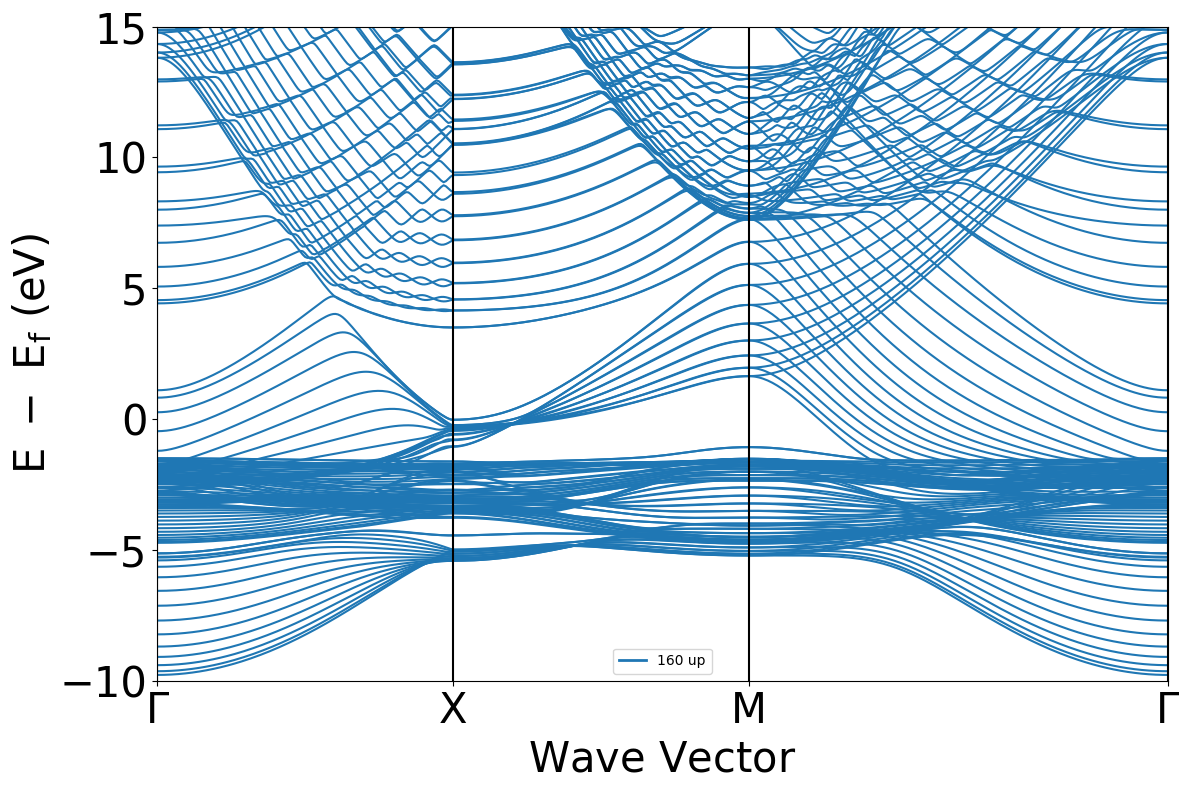

In [6]:
plotter = BSPlotter(vacuum20_highres)
# plotter.add_bs(vacuum20_highres)
# plotter.add_bs(vacuum20)
plotter.get_plot(ylim=[-10,15],bs_labels=['160','80','20'])

In [2]:
v20_raw = read_bands2raw('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum20/Cu100_mp.bands')

In [6]:
v20_raw

{'reciprocal_lattice': array([[2.51655276, 0.        , 0.        ],
        [0.        , 2.51655276, 0.        ],
        [0.        , 0.        , 0.13394786]]),
 'scaled_kpt_path': array([0.        , 0.005743  , 0.01148601, 0.01722901, 0.02297202,
        0.02871502, 0.03445803, 0.04020103, 0.04594403, 0.05168704,
        0.05743005, 0.06317305, 0.06891605, 0.07465906, 0.08040206,
        0.08614506, 0.09188807, 0.09763107, 0.10337408, 0.10911708,
        0.11486009, 0.12060309, 0.12634609, 0.1320891 , 0.1378321 ,
        0.14357511, 0.14931811, 0.15506111, 0.16080412, 0.16654713,
        0.17229013, 0.17803313, 0.18377614, 0.18951914, 0.19526214,
        0.20100515, 0.20674816, 0.21249116, 0.21823416, 0.22397717,
        0.22972017, 0.23546317, 0.24120618, 0.24694919, 0.25269219,
        0.25843519, 0.2641782 , 0.2699212 , 0.27566421, 0.28140721,
        0.28715022, 0.29289322, 0.29863622, 0.30437923, 0.31012223,
        0.31586524, 0.32160824, 0.32735124, 0.33309425, 0.33883725,
   

In [4]:
transverse_kpts = []
for point in v20_raw['kpt_cart']:
    transverse_kpts.append(np.sqrt(point[0]**2+point[1]**2))

In [5]:
transverse_kpts

[0.0,
 0.024672081926326587,
 0.049344163852653174,
 0.07401624577897975,
 0.09868835287083393,
 0.12336043479716051,
 0.1480325167234871,
 0.1727045986498137,
 0.19737668057614027,
 0.22204876250246683,
 0.24672086959432102,
 0.27139295152064763,
 0.2960650334469742,
 0.32073711537330074,
 0.3454091972996274,
 0.37008127922595396,
 0.3947533863178081,
 0.4194254682441347,
 0.4440975501704613,
 0.4687696320967879,
 0.4934417140231145,
 0.5181137959494411,
 0.5427858778757677,
 0.5674579849676218,
 0.5921300668939484,
 0.616802148820275,
 0.6414742307466015,
 0.6661463126729281,
 0.6908183945992548,
 0.7154905016911088,
 0.7401625836174355,
 0.764834665543762,
 0.7895067474700886,
 0.8141788293964153,
 0.8388509113227418,
 0.8635229932490684,
 0.8881951003409226,
 0.9128671822672492,
 0.9375392641935758,
 0.9622113461199023,
 0.986883428046229,
 1.0115555099725555,
 1.0362276170644096,
 1.0608996989907362,
 1.0855717809170629,
 1.1102438628433895,
 1.1349159447697161,
 1.159588026696042

In [7]:
band_distances = np.zeros((v20_raw['num_eigen'], v20_raw['num_kpt']))

In [8]:
for i in range(v20_raw['num_kpt']):
    band_distances[:,i] = transverse_kpts[i]

(-0.01, 0.4)

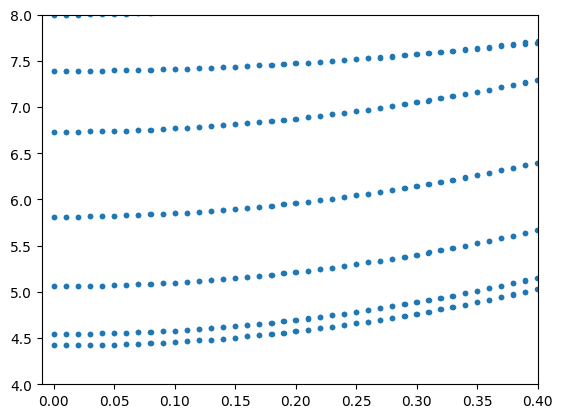

In [12]:
def read_bands2transverseBS(bands_file):
    inv_sqrt2 = 1/np.sqrt(2)
    data_raw = read_bands2raw(bands_file)
    transverse_kpts = []
    for point in data_raw['kpt_cart']:
        # transverse_kpts.append(np.sqrt((point[0]*inv_sqrt2)**2+(point[1]*inv_sqrt2)**2))
        transverse_kpts.append(np.sqrt(point[0]**2+point[1]**2))
        # transverse_kpts.append(np.abs(point[0]))
    band_distances = np.zeros((data_raw['num_eigen'], data_raw['num_kpt']))
    for i in range(data_raw['num_kpt']):
        band_distances[:,i] = transverse_kpts[i]
    return {'x':band_distances,'y':data_raw['eigenval_efermi_0']}

xy = read_bands2transverseBS('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum20/Cu100_mp.bands.o2b.001')
plt.scatter(xy['x'],xy['y'],marker='.')
plt.ylim(4,8)
plt.xlim(-0.01,.4)

In [137]:
from mp_api.client import MPRester

with MPRester(api_key="mZQ99GlhXMFHxYsa5uYYBZK4tTmJJKPW") as mpr:
    bandstructure = mpr.get_bandstructure_by_material_id("mp-30")

Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17623.13it/s]


In [14]:
read_bands2raw('./OD_debug_files/Cu100_pos_and_vol/middle/vacuum_series/vacuum90/Cu100_mp.bands')

{'reciprocal_lattice': array([[2.51655276, 0.        , 0.        ],
        [0.        , 2.51655276, 0.        ],
        [0.        , 0.        , 0.05374484]]),
 'scaled_kpt_path': array([0.        , 0.00591793, 0.01069655, 0.01386782, 0.01778971,
        0.01866667, 0.02075897, 0.02733056, 0.03181541, 0.03659403,
        0.0397653 , 0.04368719, 0.04477493, 0.04774387, 0.05447115,
        0.0587189 , 0.06349752, 0.06666879, 0.07059068, 0.07167842,
        0.07505741, 0.08166491, 0.08474149, 0.08928532, 0.09225426,
        0.09617615, 0.09726389, 0.10107097, 0.10764255, 0.10981803,
        0.11436185, 0.11733079, 0.12125269, 0.12279098, 0.12659806,
        0.13316514, 0.1374751 , 0.13885099, 0.14181994, 0.14574183,
        0.14822225, 0.15160124, 0.15816833, 0.16133026, 0.16230316,
        0.16471097, 0.16863286, 0.17207258, 0.17504153, 0.18160861,
        0.18370091, 0.1850768 , 0.18703775, 0.19095964, 0.19296533,
        0.19504344, 0.20162852, 0.20754645, 0.20892234, 0.21088328,
   

In [13]:
bandstructure.as_dict()['bands']

{'1': [[-11.6754,
   -11.6756,
   -11.6761,
   -11.6771,
   -11.6784,
   -11.6802,
   -11.6824,
   -11.685,
   -11.6879,
   -11.6912,
   -11.6949,
   -11.6986,
   -11.7025,
   -11.7064,
   -11.7101,
   -11.7135,
   -11.7165,
   -11.7189,
   -11.7208,
   -11.7219,
   -11.7223,
   -11.7223,
   -11.722,
   -11.7212,
   -11.7199,
   -11.7181,
   -11.7161,
   -11.7139,
   -11.7118,
   -11.71,
   -11.7088,
   -11.7083,
   -11.7083,
   -11.7084,
   -11.7087,
   -11.7091,
   -11.7095,
   -11.7099,
   -11.7101,
   -11.7102,
   -11.7102,
   -11.7072,
   -11.7041,
   -11.7011,
   -11.6981,
   -11.6951,
   -11.6924,
   -11.6898,
   -11.6874,
   -11.6852,
   -11.6835,
   -11.6829,
   -11.6822,
   -11.6813,
   -11.6803,
   -11.6792,
   -11.6782,
   -11.6773,
   -11.6765,
   -11.6759,
   -11.6755,
   -11.6754,
   -11.6754,
   -11.6754,
   -11.6756,
   -11.676,
   -11.6766,
   -11.6773,
   -11.6781,
   -11.6791,
   -11.6802,
   -11.6812,
   -11.6823,
   -11.6834,
   -11.6843,
   -11.6851,
   -11.6858,

In [10]:
with open('./structures/data_files/pymatgen_bandstructures/Cu_castep_bandstruct.json', 'w') as file:
    json.dump(bands.as_dict(), file)

In [5]:
def read_bands2transverseBS(bands_file):
    data_raw = read_bands2raw(bands_file)
    transverse_kpts = []
    for point in data_raw['kpt_cart']:
        transverse_kpts.append(np.sqrt(point[0]**2+point[1]**2))
    band_distances = np.zeros((data_raw['num_eigen'], data_raw['num_kpt']))
    for i in range(v20_raw['num_kpt']):
        band_distances[:,i] = transverse_kpts[i]
    return {'x':band_distances,'y':data_raw['eigenval_efermi_0']}

def testAndReturn_transVectors(vector,normal):
    # normalise the normal vector
    x = normal/np.linalg.norm(normal)
    # set up vector to construct orthonormal basis
    u = np.array([1,0,0])
    #print(np.dot(u,x))
    if (abs(np.dot(u,x)) < 1E-8 or np.linalg.norm(x-u) < 1E-6):
        print('u reset to 0 1 0')
        u = np.array([0,1,0])
    # create next basis vector
    y = np.cross(x,u)
    #print('x:', x)
    #print('y:', y)
    y /= np.linalg.norm(y)
    # create final basis vector
    z = np.cross(x,y)
    z /= np.linalg.norm(z)
    #print('z:',z)
    change_matrix = np.zeros((3,3))
    change_matrix[:,0] = x
    change_matrix[:,1] = y
    change_matrix[:,2] = z
    #print(change_matrix)
    change_matrix = np.linalg.inv(change_matrix)
    #print(change_matrix)

    new = change_matrix.dot(vector)
    #print('new :', new)
    if abs(new[0]) > 1E-8:
        trans = np.sqrt(new[1]**2+new[2]**2)
        return False,trans
    else:
        # It is orthogonal and thus we do not want it
        return True,0

def transform_pmgBS2transverseBS(bandstructure):
    transverse_kpts = []
    for idx,point in enumerate(bandstructure.as_dict()['kpoints']):
        if np.abs(point[2]) > 1E-6:
            transverse_kpts.append(idx)
    kpts = np.array(bandstructure.as_dict()['kpoints'])
    bands = np.array(bandstructure.as_dict()['bands']['1']) - bandstructure.as_dict()['efermi']
    print('shape_bands:',bands.shape)
    band_distances = np.zeros((len(transverse_kpts),bands.shape[0]))
    bands_filtered = []
    for idx,index in enumerate(transverse_kpts):
        band_distances[idx,:] = np.sqrt(kpts[index,0]**2+kpts[index,1]**2)
        # print('added_bands',bands[:,index].shape)
        bands_filtered.append(bands[:,index])
    print('shape_filtered_bands',np.array(bands_filtered).shape)
    return {'x':band_distances,'y':np.array(bands_filtered)}

def transform_pmgBulkBands2transverseBS(bandstructure, direction):
    transverse_kpts = []
    for idx,point in enumerate(bandstructure.as_dict()['kpoints']):
        ortho, trans = testAndReturn_transVectors(point, direction)
        if not ortho:
            transverse_kpts.append([idx, trans])
    bands = np.array(bandstructure.as_dict()['bands']['1'])
    print('shape_bands:',bands.shape)
    band_distances = np.zeros((len(transverse_kpts),bands.shape[0]))
    bands_filtered = []
    for idx,kpt in enumerate(transverse_kpts):
        band_distances[idx,:] = kpt[1]
        # print('added_bands',bands[:,kpt].shape)
        bands_filtered.append(bands[:,kpt[0]])
    print('shape_filtered_bands',np.array(bands_filtered).shape)
    return {'x':band_distances,'y':np.array(bands_filtered)}
    

In [94]:
a = [1,1,1]
g = a/np.linalg.norm(a)
print(g)

[0.57735027 0.57735027 0.57735027]


In [22]:
bandstructure.as_dict()

dict_keys(['@module', '@class', 'lattice_rec', 'efermi', 'kpoints', 'bands', 'is_metal', 'vbm', 'cbm', 'band_gap', 'labels_dict', 'is_spin_polarized', 'projections', 'structure', 'branches'])

In [8]:
bands_ux = read_bands2pmg('./structures/Cu_bulk_bandstruct_full_UX/Cu_bulk_bandstruct_full_UX.bands','./structures/Cu_bulk_bandstruct_full_UX/Cu_bulk_bandstruct_full_UX.cell')

[[4.190583 0.       2.419433]
 [1.396861 3.95092  2.419433]
 [0.       0.       4.838869]]
# kpts = 35 {'\\Gamma': array([0., 0., 0.]), 'K': array([0.375, 0.375, 0.75 ]), 'L': array([0.5, 0.5, 0.5]), 'U': array([0.625, 0.25 , 0.625]), 'W': array([0.5 , 0.25, 0.75]), 'X': array([0.5, 0. , 0.5])}
[0, 34]
U [0.625 0.25  0.625]
X [0.5 0.  0.5]
{'lattice': {'@module': 'pymatgen.core.lattice', '@class': 'Lattice', 'matrix': [[1.4993582771608596, -0.5301031411400876, 0.0], [0.0, 1.5903094234202633, 0.0], [-0.7496786737946677, -0.5301028124869618, 1.2984822087929198]], 'pbc': (True, True, True)}, 'fcoords': [0.625, 0.25, 0.625], 'ccoords': [0.46854975210386995, -0.26505136516184, 0.8115513804955748], 'label': 'U', '@module': 'pymatgen.electronic_structure.bandstructure', '@class': 'Kpoint'}
{'lattice': {'@module': 'pymatgen.core.lattice', '@class': 'Lattice', 'matrix': [[1.4993582771608596, -0.5301031411400876, 0.0], [0.0, 1.5903094234202633, 0.0], [-0.7496786737946677, -0.5301028124869618, 1.

In [19]:
bands = read_bands2pmg('./structures/Cu_bulk_bandstruct_full/Cu_bulk_bandstruct_full.bands','./structures/Cu_bulk_bandstruct_full/Cu_bulk_bandstruct_full.cell')
plotter = BSPlotter(bands)
# plotter.get_plot()

[[4.190583 0.       2.419433]
 [1.396861 3.95092  2.419433]
 [0.       0.       4.838869]]
# kpts = 578 {'\\Gamma': array([0., 0., 0.]), 'K': array([0.375, 0.375, 0.75 ]), 'L': array([0.5, 0.5, 0.5]), 'U': array([0.625, 0.25 , 0.625]), 'W': array([0.5 , 0.25, 0.75]), 'X': array([0.5, 0. , 0.5])}
[0, 95, 143, 177, 278, 360, 418, 452, 519, 577]
\Gamma [0. 0. 0.]
X [0.5 0.  0.5]
X [0.5 0.  0.5]
W [0.5  0.25 0.75]
W [0.5  0.25 0.75]
K [0.375 0.375 0.75 ]
K [0.375 0.375 0.75 ]
\Gamma [0. 0. 0.]
\Gamma [0. 0. 0.]
L [0.5 0.5 0.5]
L [0.5 0.5 0.5]
U [0.625 0.25  0.625]
U [0.625 0.25  0.625]
W [0.5  0.25 0.75]
W [0.5  0.25 0.75]
L [0.5 0.5 0.5]
L [0.5 0.5 0.5]
K [0.375 0.375 0.75 ]
{'lattice': {'@module': 'pymatgen.core.lattice', '@class': 'Lattice', 'matrix': [[1.4993582771608596, -0.5301031411400876, 0.0], [0.0, 1.5903094234202633, 0.0], [-0.7496786737946677, -0.5301028124869618, 1.2984822087929198]], 'pbc': (True, True, True)}, 'fcoords': [0.0, 0.0, 0.0], 'ccoords': [0.0, 0.0, 0.0], 'label': 

In [23]:
bands.as_dict()['efermi']

4.617313335621025

In [13]:
with open('./structures/data_files/pymatgen_bandstructures/Cu_matproj_bandstruct.json') as file:
    dct = json.load(file)
    bandstructure = pmg.electronic_structure.bandstructure.BandStructureSymmLine.from_dict(dct)

\Gamma [0.0, 0.0, 0.0]
X [0.5, 0.0, 0.5]
X [0.5, 0.0, 0.5]
W [0.5, 0.25, 0.75]
W [0.5, 0.25, 0.75]
K [0.375, 0.375, 0.75]
K [0.375, 0.375, 0.75]
\Gamma [0.0, 0.0, 0.0]
\Gamma [0.0, 0.0, 0.0]
L [0.5, 0.5, 0.5]
L [0.5, 0.5, 0.5]
U [0.625, 0.25, 0.625]
U [0.625, 0.25, 0.625]
W [0.5, 0.25, 0.75]
W [0.5, 0.25, 0.75]
L [0.5, 0.5, 0.5]
L [0.5, 0.5, 0.5]
K [0.375, 0.375, 0.75]
U [0.625, 0.25, 0.625]
X [0.5, 0.0, 0.5]
{'lattice': {'@module': 'pymatgen.core.lattice', '@class': 'Lattice', 'matrix': [[-1.7350816668828672, -1.7350816668828672, 1.7350816668828672], [-1.7350816668828672, 1.7350816668828672, -1.7350816668828672], [1.7350816668828672, -1.7350816668828672, -1.7350816668828672]], 'pbc': (True, True, True)}, 'fcoords': [0.0, 0.0, 0.0], 'ccoords': [0.0, 0.0, 0.0], 'label': '\\Gamma', '@module': 'pymatgen.electronic_structure.bandstructure', '@class': 'Kpoint'}
{'lattice': {'@module': 'pymatgen.core.lattice', '@class': 'Lattice', 'matrix': [[-1.7350816668828672, -1.7350816668828672, 1.73508

In [26]:
bandstructure.as_dict()['efermi']

7.51858683

shape_bands: (52, 586)
shape_filtered_bands (583, 52)
(583, 52) (583, 52)


(0.0, 0.4)

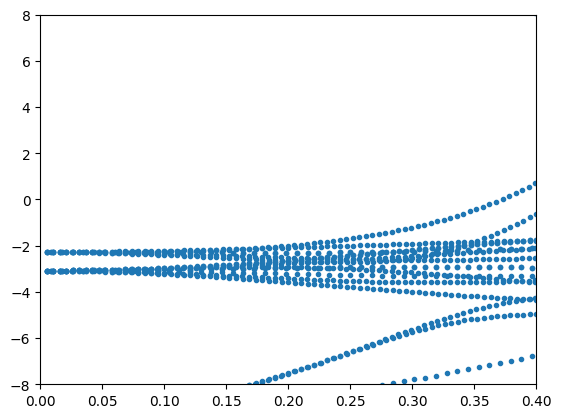

In [24]:
xy = transform_pmgBS2transverseBS(bands)
print(xy['x'].shape,xy['y'].shape)
plt.scatter(xy['x'],xy['y'],marker='.')
plt.ylim(-8,8)
plt.xlim(0,.4)

In [ ]:
# castep_bands.branches

In [ ]:
# plotter = BSPlotter(castep_bands_v90)
# plotter.add_bs(castep_bands_v20)
# plotter.get_plot(ylim=[-10,15],bs_labels=['90 $\AA$','20 $\AA$'],)
# plotter.__setattr__('fontsize',20)

plotter = BSPlotter(bs)
plotter.add_bs(castep_bands_v20)
plotter.get_plot(ylim=[-10,15],bs_labels=['CRYSTAL','CASTEP'])
plt.tight_layout()
plt.savefig('./OD_debug_files/Crystal_Cu100/Cu_comp_local_vs_pw.png',dpi=250)

In [ ]:
plotter = BSPlotter(castep_bands)
plotter.add_bs(bs)
plotter.get_plot(ylim=[-10,15],bs_labels=['CASTEP','CRYSTAL'])

# plotter = BSPlotter(bs)
# plotter.add_bs(castep_bands)
# plotter.get_plot(ylim=[-10,15],bs_labels=['CRYSTAL','CASTEP'])
plt.tight_layout()
plt.savefig('./OD_debug_files/Crystal_Cu100/Cu_bulk_castep_crystal_kipras.png',dpi=250)

In [11]:
bands

In [ ]:
from re import S


def create_k_path_crys(symm_points:np.array,num_points:np.array):
    all_points = np.zeros((num_points[-1],3))
    for idx in range(len(symm_points)-1):
        number_symmetry_line = num_points[idx+1] - num_points[idx] + 1 
        print(number_symmetry_line)
        symmetry_line_points = np.zeros((number_symmetry_line,3))
        # for x,y,z 
        for i in range(3):
            initial = symm_points[idx,i]
            final = symm_points[idx+1,i]
            spacing = np.linspace(initial,final,number_symmetry_line)
            for j in range(number_symmetry_line):
                symmetry_line_points[j,i] = spacing[j]
        if idx < 1:
            all_points[num_points[idx]-1:num_points[idx+1]] = symmetry_line_points
        else:
            all_points[num_points[idx]:num_points[idx+1]] = symmetry_line_points[1:]
    return all_points

points = np.array([[0,0,0],[0.5,0,.5],[.5,.25,.75],[0.5,0.5,.5],[0,0,0],[0.5,1,.5]])
numbers = np.array([1,112,168,247,343,500])
crys_points = create_k_path_crys(points, numbers)
for i in range(len(crys_points)):
    print(' '.join(str(round(x,6)) for x in crys_points[i,:]))


In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
ax.scatter(crys_points[:,0],crys_points[:,1],alpha=.5)
